# Importing necessary headers

In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

# Camera Calibration
# 1. Compute camera matrix and distortion coefficients to calibrate camera

In [2]:
# function to calibrate the camera
def calibrate_camera(gray, obj_points, img_points):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    return ret, mtx, dist, rvecs, tvecs

# function that returns an image after distortion correction
def correct_for_distortion(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# function to warp an image
#def warped_image(img, nx, ny, mtx, dist):

In [3]:
# specifying number of corners in an image
nx = 9 # number of corners in the x direction
ny = 6 # number of corners in the y direction

# read the test image using cv2.read() method
img = cv2.imread("camera_cal/calibration2.jpg") 

# reading in all the images and iterate through them then use glob
# images = glob.glob("camera_cal/calibration*.jpg")

# prepare object points and image points for camera calibration
obj_points = [] # these are the 3D points in the real world
img_points = [] # these are the 2D points in the image plane/world

obj_p = np.zeros((6*9,3),np.float32)
obj_p[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# convert image to gray scale using cv2.cvtColor() method
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# locate the chessboard corners using cv2.findChessboardCorners()
ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

print(ret)
# if corners are found then ret would be True, then add the points to img_points
if ret==True:
    img_points.append(corners)
    obj_points.append(obj_p)
    # draw the corners and display
    #img_cor = cv2.drawChessboardCorners(img,(9,6),corners,ret)
    #plt.imshow(img_cor)    

# Now everything is ready and we can use the cv2.calibrateCamera() function to find the distortion coefficients
ret, mtx, dist, rvecs, tvecs = calibrate_camera(gray, obj_points, img_points)

# correct for distortion
undist = correct_for_distortion(img, mtx, dist) # using distortion coeff to undistort the image
gray_undist = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

True


# Visualizing the camera calibration result

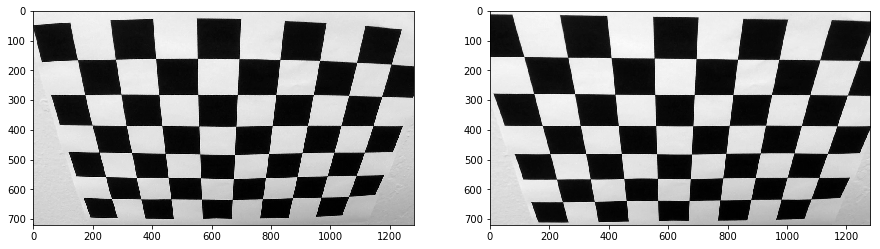

In [4]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(gray_undist,cmap="gray")

# Testing test Images after calibrating the camera

In [5]:
#test_images = glob.glob("test_images/test*.jpg")
test_image1 = mpimg.imread("test_images/test1.jpg")
test_image2 = mpimg.imread("test_images/test2.jpg")
test_image3 = mpimg.imread("test_images/test3.jpg")
test_image4 = mpimg.imread("test_images/test4.jpg")
test_image5 = mpimg.imread("test_images/test5.jpg")
test_image6 = mpimg.imread("test_images/test6.jpg")
str8_lines_1 = mpimg.imread("test_images/straight_lines1.jpg")
str8_lines_2 = mpimg.imread("test_images/straight_lines2.jpg")

In [6]:
undistorted_test_image1 = correct_for_distortion(test_image1, mtx, dist)
undistorted_test_image2 = correct_for_distortion(test_image2, mtx, dist)
undistorted_test_image3 = correct_for_distortion(test_image3, mtx, dist)
undistorted_test_image4 = correct_for_distortion(test_image4, mtx, dist)
undistorted_test_image5 = correct_for_distortion(test_image5, mtx, dist)
undistorted_test_image6 = correct_for_distortion(test_image6, mtx, dist)
undistorted_str8_lines_1 = correct_for_distortion(str8_lines_1, mtx, dist)
undistorted_str8_lines_2 = correct_for_distortion(str8_lines_2, mtx, dist)

# Undistorted test image 1 

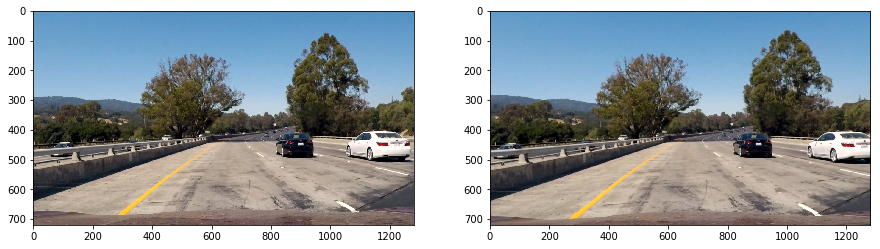

In [7]:
# test-image-1, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image1)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image1)

# Undistorted test image 2 

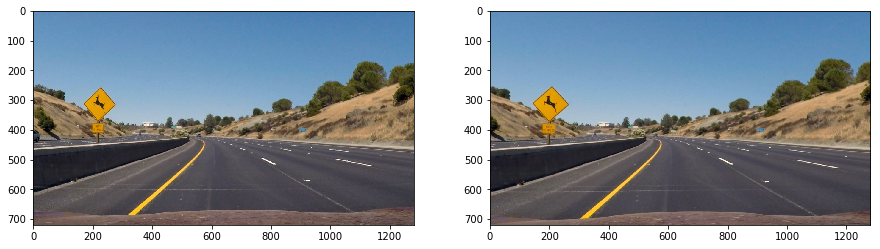

In [8]:
# test-image-2, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image2)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image2)

# Undistorted test image 3

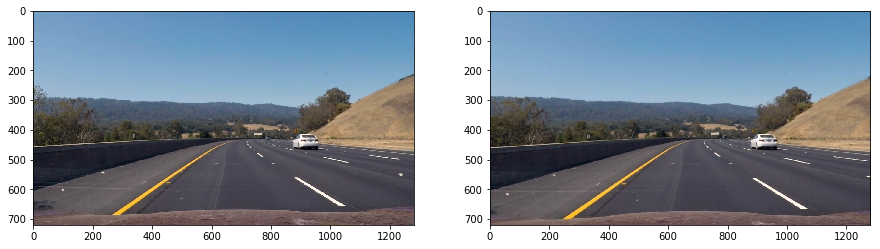

In [9]:
# test-image-3, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image3)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image3)

# Undistorted test image 4

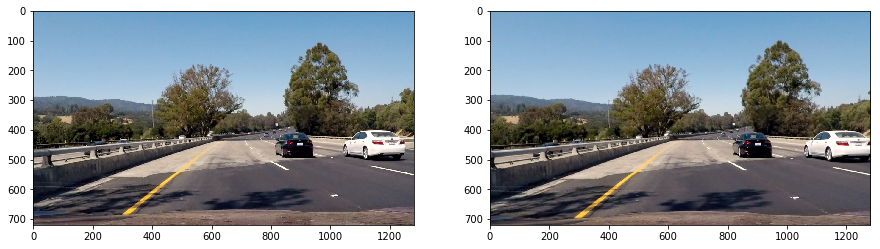

In [10]:
# test-image-4, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image4)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image4)

# Undistorted test image 5

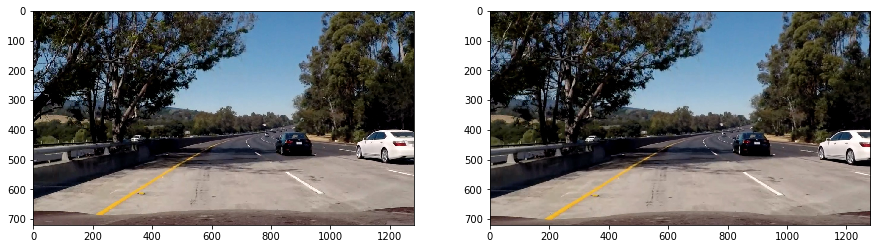

In [11]:
# test-image-5, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image5)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image5)

# Undistorted test image 6 

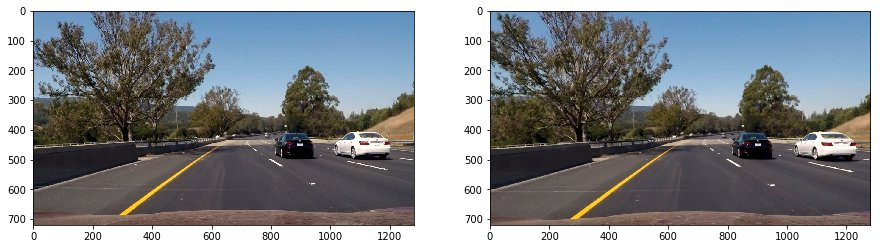

In [12]:
# test-image-6, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image6)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image6)

# Undistorted straight lines 1 

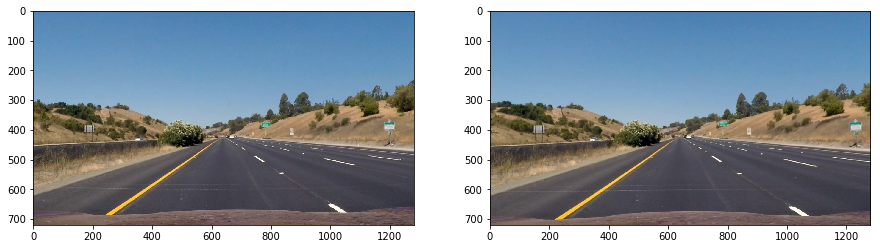

In [13]:
# straight_lines_1, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(str8_lines_1)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_str8_lines_1)

# Undistorted straight lines 2 

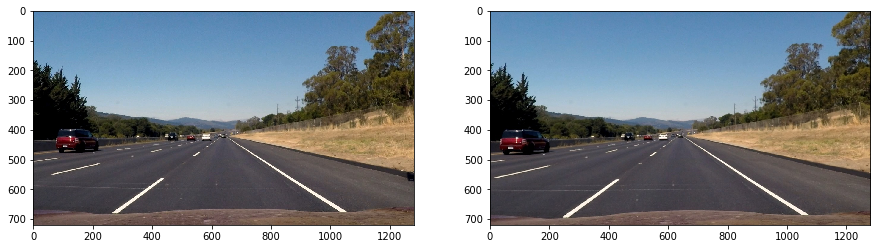

In [14]:
# straight_lines_2, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(str8_lines_2)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_str8_lines_2)

# Color transform and gradients
# 2. Use color transforms and gradients to create a thresholded binary image

In [53]:
def abs_sobel_thresh(i, orient='x', sobel_kernel=3, abs_thresh=(0,255)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # based on orient value compute sobelx or sobely followed by absolute value
    if orient=='x':
        sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
        abs_sobel = np.absolute(sobelx)
    else:
        sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
        abs_sobel = np.absolute(sobely)
    # convert the absolute value to 8-bit
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # define a binary output
    binary_output = np.zeros_like(scaled_sobel)
    # applying the threshold
    binary_output[(scaled_sobel>=abs_thresh[0]) & (scaled_sobel<=abs_thresh[1])]=1
    # return binary output
    return binary_output
        
def mag_thresh(i, sobel_kernel = 3, magnitude_thresh=(0,255)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # compute sobelx and sobely
    sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # compute the magnitude
    mag = np.sqrt(sobely*sobely + sobelx*sobelx)
    # scale to 8-bit and convert to type uint8
    scale_factor = np.max(mag)/255
    scaled_mag = (mag/scale_factor).astype(np.uint8)
    # define a binary output
    binary_output = np.zeros_like(gray_i)
    # apply the threshold
    binary_output[(scaled_mag>=magnitude_thresh[0]) & (scaled_mag<=magnitude_thresh[1])]=1
    # return the binary_output
    return binary_output

def direc_thresh(i, sobel_kernel = 3, dir_thresh=(0,np.pi/2)):
    # convert to a grayscale image
    gray_i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    # compute sobelx and sobely
    sobelx = cv2.Sobel(gray_i,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray_i,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # compute the direction of the gradient
    abs_grad_dir = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    # define a binary output
    binary_output = np.zeros_like(gray_i)
    # applying the threshold
    binary_output[(abs_grad_dir>=dir_thresh[0]) & (abs_grad_dir<=dir_thresh[1])]=1
    # return the binary output
    return binary_output

def S_thresh(i, s_thresh=(0,255)): 
    # convert image from RGB to HLS channel
    hls = cv2.cvtColor(i, cv2.COLOR_RGB2HLS)
    # separatre the S channel
    S = hls[:,:,2]
    # define a binary output
    binary_output = np.zeros_like(S)
    # applying the threshold
    print(s_thresh)
    binary_output[(S > s_thresh[0]) & (S <= s_thresh[1])]=1
    # return the binary output
    return binary_output

def comibned_threshold(abs_sobel_x, abs_sobel_y, m_thresh, d_thresh):
    combine = np.zeros_like(mag_thresh_test1)
    combine[((abs_sobel_x==1)&(abs_sobel_y==1)) | ((m_thresh==1)&(d_thresh==1))]=1
    return combine

def get_thresholded_image(i):
    # choode a kernel size
    ksize = 3 # large odd number for smoother gradient measurements
    # obtain sobel x thresholded image
    abs_thresh_x = abs_sobel_thresh(i,orient='x',sobel_kernel=ksize, abs_thresh=(20,100))
    # obtain sobel y thresholded image
    abs_thresh_y = abs_sobel_thresh(i,orient='y',sobel_kernel=ksize, abs_thresh=(20,100))
    # obtain magnitude thresholded image
    magnitude_t = mag_thresh(i,sobel_kernel=ksize,magnitude_thresh=(20,100))
    # obtain directional thresholded image
    direction_t = direc_thresh(i, sobel_kernel=15,dir_thresh=(0.7,1.3))#(0,np.pi/2))
    # obtain S channel thresholded image after color trasnform to HLS type
    hls_s_thresh = S_thresh(i,s_thresh=(90,255))
    combined = comibned_threshold(abs_thresh_x, abs_thresh_y, magnitude_t, direction_t)
    return abs_thresh_x, abs_thresh_y, magnitude_t, direction_t, hls_s_thresh, combined

In [57]:
# function call to obtain all the thresholded images in one line
abs_thresh_x_test11, abs_thresh_y_test11, mag_thresh_test11,\
dir_thresh_test11, hls_s_thresh_test11, combined = get_thresholded_image(undistorted_test_image1)

(90, 255)


Text(0.5,1,'Magnitude Threshold, range from 20 to 100')

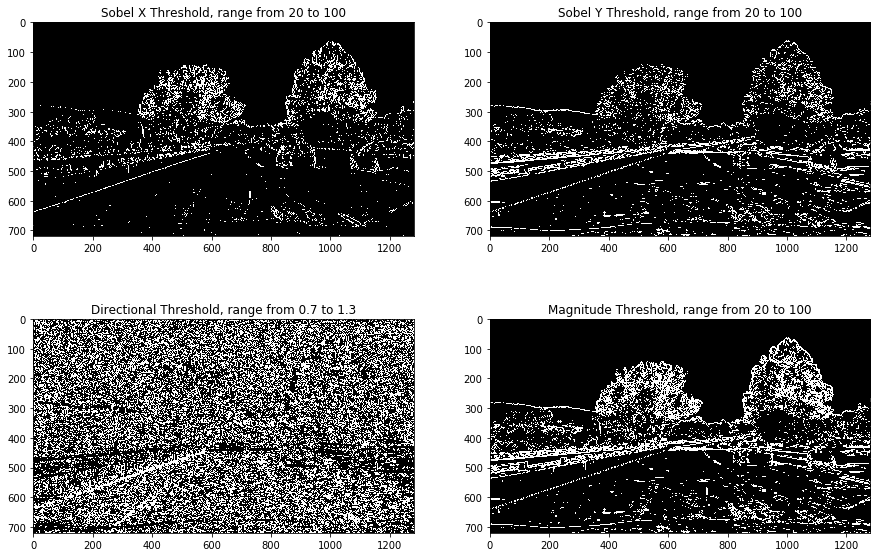

In [58]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax.imshow(abs_thresh_x_test11,cmap="gray")
ax.set_title("Sobel X Threshold, range from 20 to 100")
ax2 = f.add_subplot(222)
ax2.imshow(abs_thresh_y_test11,cmap="gray")
ax2.set_title("Sobel Y Threshold, range from 20 to 100")
ax = f.add_subplot(223)
ax.imshow(dir_thresh_test11,cmap="gray")
ax.set_title("Directional Threshold, range from 0.7 to 1.3")
ax2 = f.add_subplot(224)
ax2.imshow(mag_thresh_test11,cmap="gray")
ax2.set_title("Magnitude Threshold, range from 20 to 100")

Text(0.5,1,'S channel Threshold, range from 90 to 255')

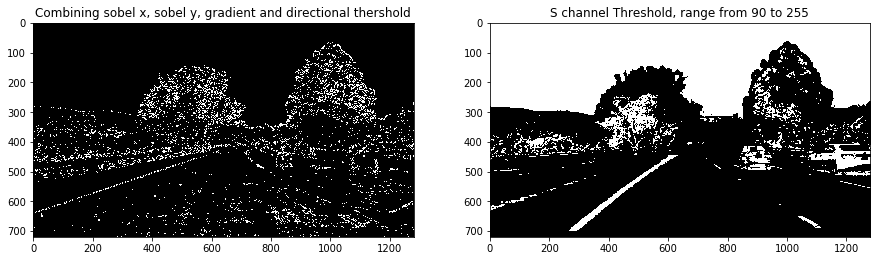

In [59]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax.imshow(combined,cmap="gray")
ax.set_title("Combining sobel x, sobel y, gradient and directional thershold")
ax2 = f.add_subplot(222)
ax2.imshow(hls_s_thresh_test11,cmap="gray")
ax2.set_title("S channel Threshold, range from 90 to 255")

# So far, it is evident that just using a color threshold for the S channel after converting the image into HLS color space gives a good result for the binary image that can be used for further analysis